# REGRESSION

We want to use K-Mean regression to segment the data set. We use the steep to calculate total sales for all stores at each timestamp. Once we have the aggregated time series, we can use k-means to identify clusters that represent various overall sales patterns.

The EDA of this regression can be found at https://colab.research.google.com/drive/1VkKG2lVDXLjMhaf-BrfkMVLzhdhswtgm#scrollTo=A_MmcpyaL2lO.


In [ ]:
# Install `gdown` library to download files from Google Drive to Google Colab.
!pip install gdown

In [ ]:
# Import Library
import pandas as pd   # Library used to analyze data.
import numpy as np    # Library used to analyze data.
import seaborn as sns # Library used to do visualization.
import gdown          # library used to download files from Google Drive.
import pickle         # Library used to store and read files in pickle format.
import matplotlib.pyplot as plt

In [ ]:
# Download `Regression` dataset from Google Drive.
url = "https://drive.google.com/file/d/1ohZPIw0lh2MYx3iwIRt9eMVaQI2wK_UV/view?usp=sharing"
output = 'data_regression.pickle'
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1ohZPIw0lh2MYx3iwIRt9eMVaQI2wK_UV
To: /content/data_regression.pickle
100%|██████████| 107M/107M [00:00<00:00, 154MB/s] 


'data_regression.pickle'

In [ ]:
# Insert the `Store` dataset to Pandas Dataframe.
df = pd.read_pickle('/content/data_regression.pickle')
df.set_index('date', inplace=True)
df.drop(columns='id',inplace=True)
df.rename(columns={'return_rate': 'ROI'}, inplace=True)
df.head()

,category,product_name,units,store_name,city,status_city,state,region,loc,open_date,cost,price,revenue,production,profit,ROI
date,,,,,,,,,,,,,,,,
2017-01-01,Games,Chutes & Ladders,1,Maven Toys Aguascalientes 1,Aguascalientes,State capital and largest city,Aguascalientes,West,Downtown,2010-07-31,9.99,12.99,12.99,9.99,3.0,0.300
2017-01-01,Toys,Action Figure,1,Maven Toys Puebla 2,Puebla,State capital and largest city,Puebla,East,Downtown,2011-04-01,9.99,15.99,15.99,9.99,6.0,0.601
2017-01-01,Games,Deck Of Cards,1,Maven Toys Mexicali 1,Mexicali,State capital,Baja California,North,Commercial,2003-12-13,3.99,6.99,6.99,3.99,3.0,0.752
2017-01-01,Sports & Outdoors,Dart Gun,1,Maven Toys Saltillo 2,Saltillo,State capital and largest city,Coahuila,North,Commercial,2016-03-23,11.99,15.99,15.99,11.99,4.0,0.334
2017-01-01,Toys,Lego Bricks,1,Maven Toys Puebla 3,Puebla,State capital and largest city,Puebla,East,Residential,2014-12-27,34.99,39.99,39.99,34.99,5.0,0.143


In [ ]:
# Group data month series from all the 50 stores
df_avg = df.copy()
def create_features(df_avg):
    """
    Create time series features based on time series index.
    """
    df_avg = df_avg.copy()
    df_avg['dayofweek'] = df_avg.index.dayofweek
    df_avg['quarter'] = df_avg.index.quarter
    df_avg['month'] = df_avg.index.month
    df_avg['year'] = df_avg.index.year
    df_avg['dayofyear'] = df_avg.index.dayofyear
    df_avg['dayofmonth'] = df_avg.index.day
    df_avg['weekofyear'] = df_avg.index.isocalendar().week
    return df_avg

df_avg = create_features(df_avg)

In [ ]:
df_avg = df_avg.groupby(['product_name','year','month'])['units','revenue','production','profit'].sum().reset_index()
df_avg.head()

<ipython-input-254-a50ca47f4db5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_avg = df_avg.groupby(['product_name','year','month'])['units','revenue','production','profit'].sum().reset_index()


,product_name,year,month,units,revenue,production,profit
0,Action Figure,2017,1,3441,55021.59,34375.59,20646.0
1,Action Figure,2017,2,3145,50288.55,31418.55,18870.0
2,Action Figure,2017,3,3624,57947.76,36203.76,21744.0
3,Action Figure,2017,4,3705,59242.95,37012.95,22230.0
4,Action Figure,2017,5,3588,57372.12,35844.12,21528.0


In [ ]:
df_avg = df_avg.groupby(['product_name'])['units','revenue','production','profit'].mean().round(2).reset_index()
df_avg.set_index('product_name', inplace=True)
df_avg

<ipython-input-255-166a8d0ba694>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_avg = df_avg.groupby(['product_name'])['units','revenue','production','profit'].mean().round(2).reset_index()


,units,revenue,production,profit
product_name,,,,
Action Figure,2759.90,44130.88,27571.45,16559.43
Animal Figures,1861.38,24179.34,18595.20,5584.14
Barrel O' Slime,5391.94,21513.85,10729.96,10783.88
Chutes & Ladders,182.33,2368.51,1821.51,547.00
Classic Dominoes,212.90,2126.92,1701.11,425.81
Colorbuds,4969.90,74498.87,34739.63,39759.24
Dart Gun,1504.19,24052.01,18035.24,6016.76
Deck Of Cards,4001.62,27971.32,15966.46,12004.86
Dino Egg,2124.22,23345.20,21220.98,2124.22


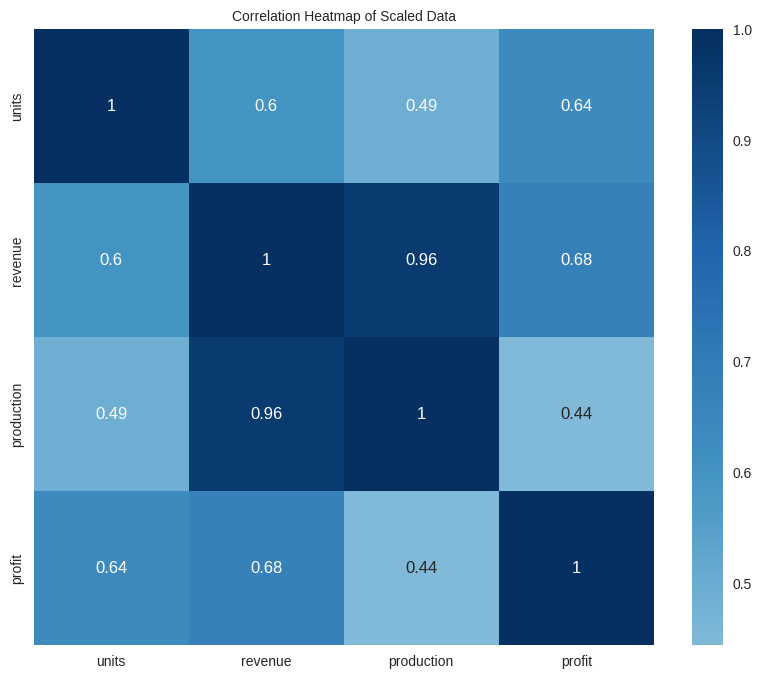

In [ ]:
from sklearn.preprocessing import StandardScaler
# scaler dataframe
# using Standart Scaler
heatmapscaler_df = df_avg.copy()
columns_to_scale = ['units',	'revenue',	'production',	'profit']

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the selected columns
df_scaled = scaler.fit_transform(heatmapscaler_df[columns_to_scale])

# Create a new DataFrame with scaled data
df_scaled = pd.DataFrame(df_scaled, columns=columns_to_scale)

# Calculate the correlation matrix for scaled data
correlation_matrix = df_scaled.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', center=0)
plt.title("Correlation Heatmap of Scaled Data",fontsize=10)
plt.show()

dari data ini 2 yang signifikan korelasi nya rendah yaitu:
* production + ROI -0.068
* production + city -0.081
* location + city -0.086

# Preparing A = 'REVENUE', B = 'PRODUCTION'

Here we want to create our cluster using these feature :
* Revenue
* Production

In [ ]:
# CLUSTER
from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to sacalling different attribute
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)

import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis
from sklearn.datasets import make_blobs                                        # Generate isotropic Gaussian blobs for clustering
from yellowbrick.cluster import SilhouetteVisualizer

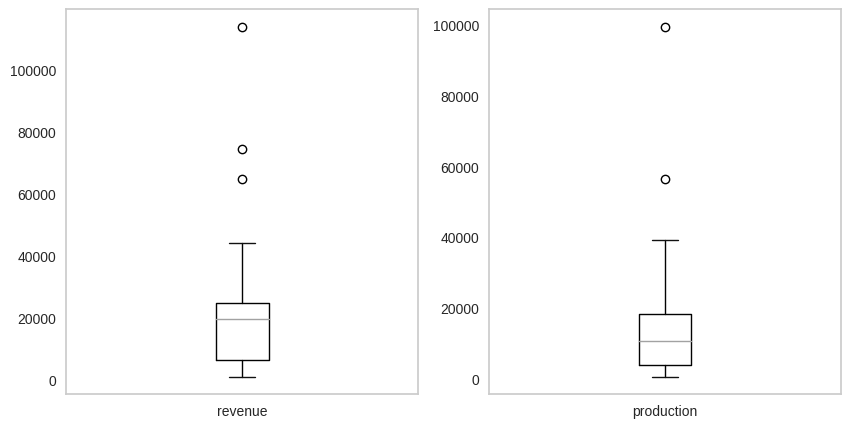

In [ ]:
# filter numeric column
feature = ['revenue','production'] # <------- CHANGE

#adjust chart position and chart size
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5))

# for 0 (i) , Income (el)
for i,el in enumerate(feature):
    a = df_avg.boxplot(el, ax=axes.flatten()[i],grid=False)

#Show Chart
plt.show()

In [ ]:
df_segmentation_feature = df_avg[['revenue','production']].copy() # <------- CHANGE
df_segmentation_feature.rename(columns={'revenue': 'A','production':'B'}, inplace=True) # <------- CHANGE
df_segmentation_feature

,A,B
product_name,,
Action Figure,44130.88,27571.45
Animal Figures,24179.34,18595.20
Barrel O' Slime,21513.85,10729.96
Chutes & Ladders,2368.51,1821.51
Classic Dominoes,2126.92,1701.11
Colorbuds,74498.87,34739.63
Dart Gun,24052.01,18035.24
Deck Of Cards,27971.32,15966.46
Dino Egg,23345.20,21220.98


In [ ]:
df_segmentation_feature.head()

,A,B
product_name,,
Action Figure,44130.88,27571.45
Animal Figures,24179.34,18595.20
Barrel O' Slime,21513.85,10729.96
Chutes & Ladders,2368.51,1821.51
Classic Dominoes,2126.92,1701.11


In [ ]:
# Define Robust Scale dataset
ss_scale_df = df_segmentation_feature.copy()
rs_scale_df = df_segmentation_feature.copy()
column = df_segmentation_feature.columns.to_list()

# using Standart Scaler
ss_scaler = StandardScaler()
ss_scale_df[['A','B']] = ss_scaler.fit_transform(ss_scale_df[['A','B']])

# using RobustScaler Scaler
rs_scaler = RobustScaler()
rs_scale_df[['A','B']] = rs_scaler.fit_transform(rs_scale_df[['A','B']])

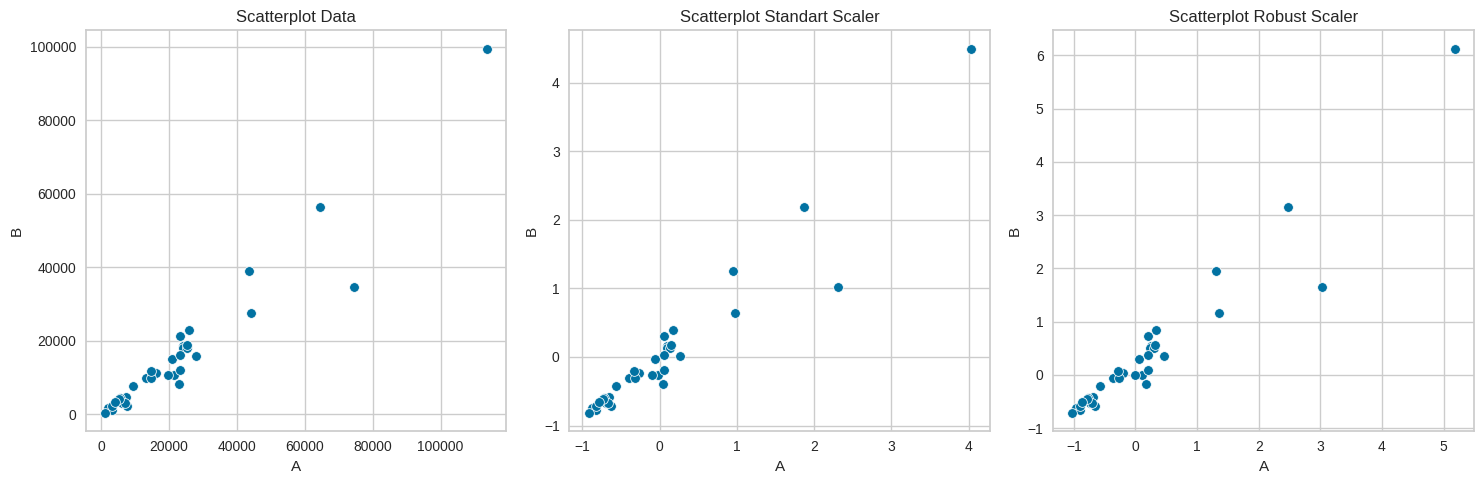

In [ ]:
# Now, create a subplot with 1 rows and 2 columns for scatterplot
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first scatterplot for df_segmentation_feature
sns.scatterplot(data = df_segmentation_feature, x='A', y='B', ax=ax[0])
ax[0].set_title('Scatterplot Data')

# Plot the first scatterplot for df_segmentation_feature
sns.scatterplot (data = ss_scale_df, x='A', y='B', ax=ax[1])
ax[1].set_title('Scatterplot Standart Scaler')

# Plot the first scatterplot for rs_scale
sns.scatterplot (data = rs_scale_df, x='A', y='B', ax=ax[2])
ax[2].set_title('Scatterplot Robust Scaler')

# Adjust the layout to prevent overlapping titles and axis labels for scatterplot
plt.tight_layout()

# Show the combined subplot
plt.show()

# Cluster

## Define K-Means Clustering
For k-means clustering, we need to determine n_clusters, number of cluster we want to create.

Let's suppose we want to create 3 cluster of customer. Then n_clusters = 3

In [ ]:
scale_df = ss_scale_df.copy() # <------- CHANGE

In [ ]:
# Initialize KMeans for 3 clusters
cluster_model = KMeans(n_clusters = 3, random_state = 1000, n_init='auto')
cluster_model

KMeans(n_clusters=3, n_init='auto', random_state=1000)

In [ ]:
# Fit the data into model
cluster_model.fit(scale_df)

KMeans(n_clusters=3, n_init='auto', random_state=1000)

In [ ]:
# Check up cluster label created by the KMeans
cluster_model.labels_

array([0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2], dtype=int32)

In [ ]:
# Check up cluster label created by the KMeans
cluster_model.labels_

array([0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2], dtype=int32)

In [ ]:
scale_df = scale_df.copy()
scale_df['cluster'] = cluster_model.labels_
scale_df.head()

,A,B,cluster
product_name,,,
Action Figure,0.973078,0.639448,0
Animal Figures,0.096468,0.158382,0
Barrel O' Slime,-0.020645,-0.263142,2
Chutes & Ladders,-0.861833,-0.740576,2
Classic Dominoes,-0.872447,-0.747028,2


In [ ]:
scale_df.cluster.value_counts()

2    22
0    12
1     1
Name: cluster, dtype: int64

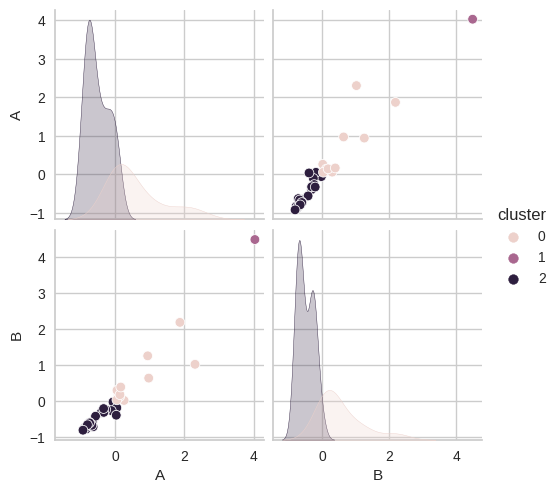

In [ ]:
# Let's re-look into data after clustering
sns.pairplot(scale_df,hue='cluster')

## Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

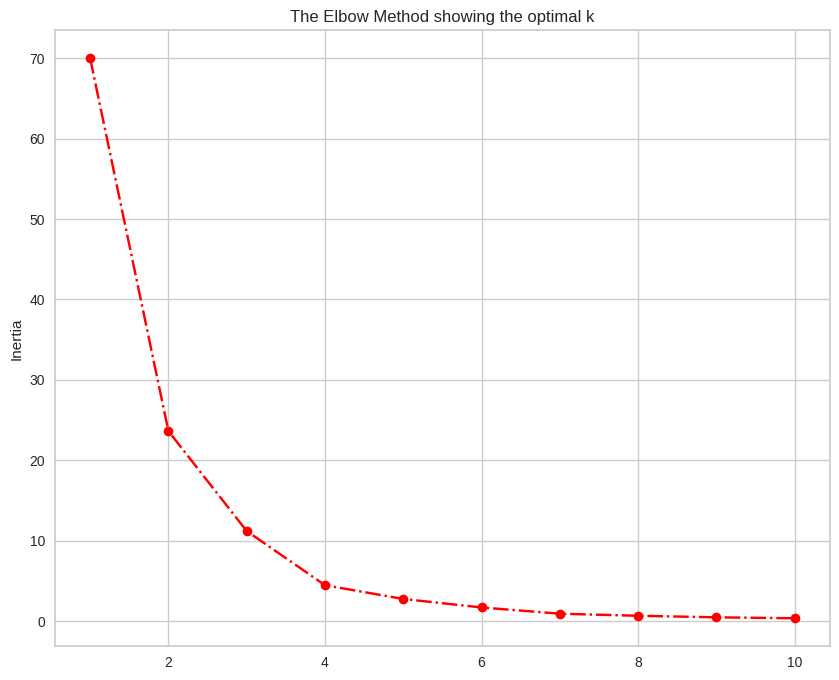

[70.0, 23.630244078378382, 11.200793722439165, 4.465186268708617, 2.7525308692288712, 1.6959363877167632, 0.920176468576156, 0.6633867517701866, 0.4712496236410359, 0.351074589784645]


In [ ]:
# K-Means Clustering
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++')
    kmeanModel.fit(ss_scale_df) # <------- CHANGE
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize = (10,8))
plt.plot(range(1, 11), distortions, marker = 'o', linestyle = '-.',color='red')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

## Silhouette Analysis

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

For k=2, the average silhouette score is 0.73094009006734
For k=3, the average silhouette score is 0.6738260350954425
For k=4, the average silhouette score is 0.605094978413832
For k=5, the average silhouette score is 0.6004887812358355
For k=6, the average silhouette score is 0.5719031044873972
For k=7, the average silhouette score is 0.5629998353454019
For k=8, the average silhouette score is 0.5315209745109347
For k=9, the average silhouette score is 0.5059843794732455


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=10, the average silhouette score is 0.44017290776823476


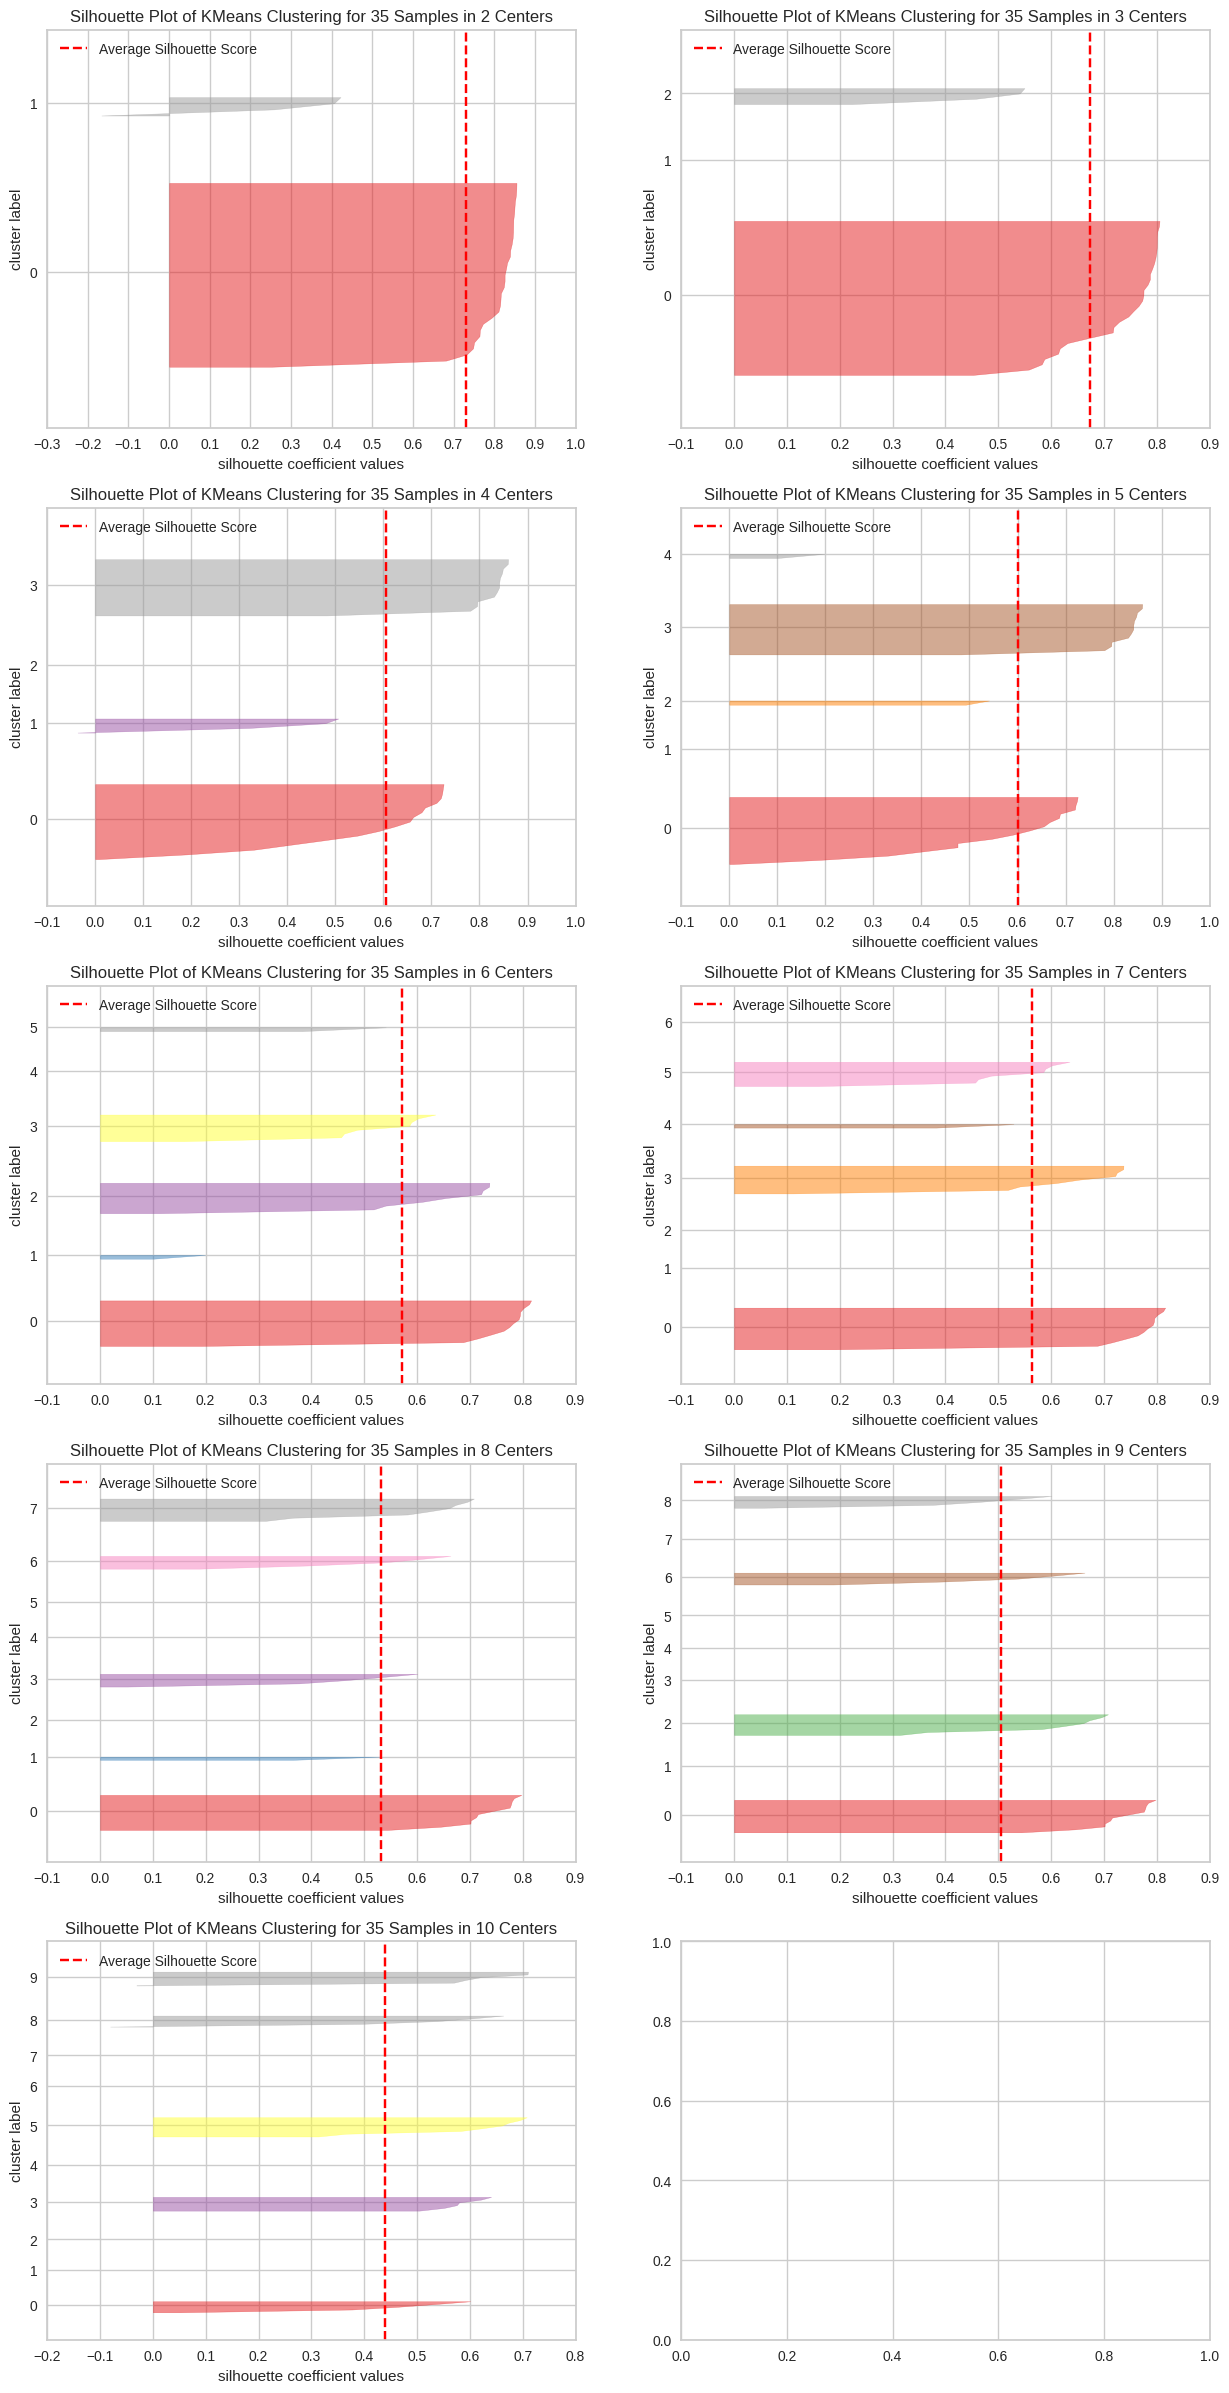

In [ ]:
# Silhouette score plot
K = range(2,11)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = cluster.KMeans(n_clusters, random_state = 42)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(ss_scale_df) # <------- CHANGE
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

# Segmentation
Cluster 7

In [ ]:
# make cluster
Cluster = ss_scale_df.copy() # <------- CHANGE

cluster_model = KMeans(n_clusters=4)
cluster_model.fit_predict(Cluster[['A','B']])
Cluster['cluster'] = cluster_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Boxplot for B = Production (Standart Scaler)')

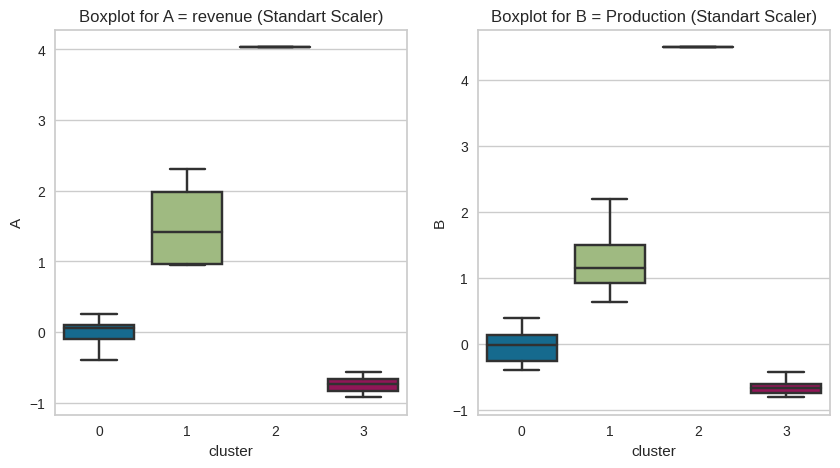

In [ ]:
# Create a subplot with 3 rows and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first boxplot (A) for Cluster_rs
sns.boxplot(data=Cluster, x='cluster', y='A', ax=ax[0])
ax[0].set_title('Boxplot for A = revenue (Standart Scaler)')

# Plot the second boxplot (B) for Cluster_rs
sns.boxplot(data=Cluster, x='cluster', y='B', ax=ax[1])
ax[1].set_title('Boxplot for B = Production (Standart Scaler)')


# Merge Hasil cluster dengan dataset

In [ ]:
Cluster.head()

,A,B,cluster
product_name,,,
Action Figure,0.973078,0.639448,1
Animal Figures,0.096468,0.158382,0
Barrel O' Slime,-0.020645,-0.263142,0
Chutes & Ladders,-0.861833,-0.740576,3
Classic Dominoes,-0.872447,-0.747028,3


In [ ]:
df_avg = df_avg.reset_index()
Cluster = Cluster.reset_index()
df_segmented = Cluster.merge(df_avg, how= 'inner',right_on='product_name',left_on='product_name')
df_segmented

,product_name,A,B,cluster,units,revenue,production,profit
0,Action Figure,0.973078,0.639448,1,2759.90,44130.88,27571.45,16559.43
1,Animal Figures,0.096468,0.158382,0,1861.38,24179.34,18595.20,5584.14
2,Barrel O' Slime,-0.020645,-0.263142,0,5391.94,21513.85,10729.96,10783.88
3,Chutes & Ladders,-0.861833,-0.740576,3,182.33,2368.51,1821.51,547.00
4,Classic Dominoes,-0.872447,-0.747028,3,212.90,2126.92,1701.11,425.81
5,Colorbuds,2.307354,1.023615,1,4969.90,74498.87,34739.63,39759.24
6,Dart Gun,0.090874,0.128372,0,1504.19,24052.01,18035.24,6016.76
7,Deck Of Cards,0.263076,0.017499,0,4001.62,27971.32,15966.46,12004.86
8,Dino Egg,0.059819,0.299106,0,2124.22,23345.20,21220.98,2124.22
9,Dinosaur Figures,-0.056006,-0.024492,0,1381.52,20709.04,15182.95,5526.10


# Visualize Cluster
For no we call our clusters as is, then we will create an interesting name for naming the cluster

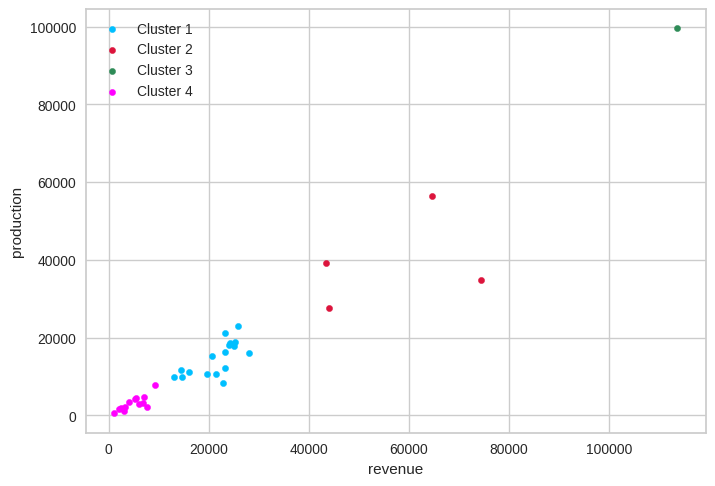

In [ ]:
cluster_scatter = df_segmented[df_segmented['cluster'] == 0].plot.scatter(x='revenue', y='production', c='deepskyblue', label='Cluster 1')
cluster_scatter = df_segmented[df_segmented['cluster'] == 1].plot.scatter(x='revenue', y='production', c='crimson', label='Cluster 2', ax = cluster_scatter)
cluster_scatter = df_segmented[df_segmented['cluster'] == 2].plot.scatter(x='revenue', y='production', c='seagreen', label='Cluster 3', ax = cluster_scatter)
cluster_scatter = df_segmented[df_segmented['cluster'] == 3].plot.scatter(x='revenue', y='production', c='magenta', label='Cluster 4', ax = cluster_scatter)
# cluster_scatter = df_segmented[df_segmented['cluster'] == 4].plot.scatter(x='revenue', y='production', c='blue', label='Cluster 5', ax = cluster_scatter)

## Descriptive Statistic

In [ ]:
df_segmented.groupby('cluster',as_index = False)[['revenue','production']].agg(['count','mean','min','max','median','std']).T

cluster                       0             1          2            3
revenue    count      17.000000      4.000000       1.00    13.000000
           mean    21481.157647  56675.652500  113756.32  4907.074615
           min     13051.970000  43475.390000  113756.32  1031.090000
           max     27971.320000  74498.870000  113756.32  9258.060000
           median  23218.760000  54364.175000  113756.32  5359.320000
           std      4425.665411  15406.065058        NaN  2474.012725
production count      17.000000      4.000000       1.00    13.000000
           mean    14674.397059  39488.622500   99533.22  3111.206923
           min      8295.210000  27571.450000   99533.22   514.900000
           max     22922.930000  56517.730000   99533.22  7776.180000
           median  15182.950000  36932.655000   99533.22  3067.070000
           std      4458.668013  12311.162410        NaN  1898.895860

## Cluster Interpretation
1.   units
2.   cost
3.   price
4.   revenue
5.   production



In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['units','revenue','production','profit'].mean().round(2)

<ipython-input-280-a0ad3d85541f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_segmented.groupby(['cluster'], as_index = False)['units','revenue','production','profit'].mean().round(2)


,cluster,units,revenue,production,profit
0,0,2111.14,21481.16,14674.40,6806.76
1,1,3486.13,56675.65,39488.62,17187.03
2,2,2844.62,113756.32,99533.22,14223.10
3,3,451.11,4907.07,3111.21,1795.87


3 = low
0 = middle
1 = middle high
2 = high

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['product_name'].count()

,cluster,product_name
0,0,17
1,1,4
2,2,1
3,3,13


3 = low
0 = middle
1 = middle high
2 = high

Tableau format

In [ ]:
tableau = df_segmented[['product_name','cluster','units','revenue','production','profit']].round(2)
tableau['cluster'] = tableau['cluster'].replace({3: 'low', 0: 'middle',1: 'middle high',2: 'high'}) #<---- ganti cluster sesuaikan
tableau['ROI'] = (tableau['profit'] / tableau['production']).round(3)
tableau

,product_name,cluster,units,revenue,production,profit,ROI
0,Action Figure,middle high,2759.90,44130.88,27571.45,16559.43,0.601
1,Animal Figures,middle,1861.38,24179.34,18595.20,5584.14,0.300
2,Barrel O' Slime,middle,5391.94,21513.85,10729.96,10783.88,1.005
3,Chutes & Ladders,low,182.33,2368.51,1821.51,547.00,0.300
4,Classic Dominoes,low,212.90,2126.92,1701.11,425.81,0.250
5,Colorbuds,middle high,4969.90,74498.87,34739.63,39759.24,1.144
6,Dart Gun,middle,1504.19,24052.01,18035.24,6016.76,0.334
7,Deck Of Cards,middle,4001.62,27971.32,15966.46,12004.86,0.752
8,Dino Egg,middle,2124.22,23345.20,21220.98,2124.22,0.100
9,Dinosaur Figures,middle,1381.52,20709.04,15182.95,5526.10,0.364


In [ ]:
# Download `Products` dataset from Google Drive.
url = "https://drive.google.com/file/d/1l0AChr0J1bhQRS0PO-kwEReEGDFt6Az7/view?usp=sharing"
output = 'products.csv'
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1l0AChr0J1bhQRS0PO-kwEReEGDFt6Az7
To: /content/products.csv
100%|██████████| 1.57k/1.57k [00:00<00:00, 5.23MB/s]


'products.csv'

In [ ]:
# Insert the `Products` dataset to Pandas Dataframe.
products = pd.read_csv('/content/products.csv')
products = products.rename(columns={'Product_ID':'product_id', 'Product_Name':'product_name', 'Product_Category':'category', 'Product_Cost':'cost',
       'Product_Price':'price'})
products['product_id'] = products['product_id'].astype(str)
products[['cost', 'price']] = products[['cost', 'price']].replace('\$', '', regex=True).astype(float)
products = products[['product_name','category','cost','price']]
products['profit_items'] = products['price'] - products['cost']

# Add costly column
def get_costly(cost):
    if cost < 10:
        return 'low'
    elif cost <= 20:
        return 'middle'
    else:
        return 'high'

# Add costly column
def get_pricely(price):
    if price < 10:
        return 'low'
    elif price <= 20:
        return 'middle'
    else:
        return 'high'

# Add profitable column
def get_profitable(profit_items):
    if profit_items < 5:
        return 'non-significant'
    else:
        return 'significant'

products['costly'] = products['cost'].apply(get_costly)
products['pricely'] = products['price'].apply(get_pricely)
products['profitable'] = products['profit_items'].apply(get_profitable)
products.head()

,product_name,category,cost,price,profit_items,costly,pricely,profitable
0,Action Figure,Toys,9.99,15.99,6.0,low,middle,significant
1,Animal Figures,Toys,9.99,12.99,3.0,low,middle,non-significant
2,Barrel O' Slime,Art & Crafts,1.99,3.99,2.0,low,low,non-significant
3,Chutes & Ladders,Games,9.99,12.99,3.0,low,middle,non-significant
4,Classic Dominoes,Games,7.99,9.99,2.0,low,low,non-significant


In [ ]:
combo1 = tableau.merge(products, how='left', left_on = 'product_name', right_on = 'product_name')
combo1.head()

,product_name,cluster,units,revenue,production,profit,ROI,category,cost,price,profit_items,costly,pricely,profitable
0,Action Figure,middle high,2759.90,44130.88,27571.45,16559.43,0.601,Toys,9.99,15.99,6.0,low,middle,significant
1,Animal Figures,middle,1861.38,24179.34,18595.20,5584.14,0.300,Toys,9.99,12.99,3.0,low,middle,non-significant
2,Barrel O' Slime,middle,5391.94,21513.85,10729.96,10783.88,1.005,Art & Crafts,1.99,3.99,2.0,low,low,non-significant
3,Chutes & Ladders,low,182.33,2368.51,1821.51,547.00,0.300,Games,9.99,12.99,3.0,low,middle,non-significant
4,Classic Dominoes,low,212.90,2126.92,1701.11,425.81,0.250,Games,7.99,9.99,2.0,low,low,non-significant


In [ ]:
low_cluster = combo1[combo1['cluster'] == 'low'].sort_values(by='units', ascending=False)
low_cluster

,product_name,cluster,units,revenue,production,profit,ROI,category,cost,price,profit_items,costly,pricely,profitable
14,Hot Wheels 5-Pack,low,1192.58,7143.55,4758.39,2385.16,0.501,Toys,3.99,5.99,2.0,low,low,non-significant
26,PlayDoh Toolkit,low,1101.33,5495.65,4394.32,1101.33,0.251,Art & Crafts,3.99,4.99,1.0,low,low,non-significant
15,Jenga,low,767.88,7671.14,2295.97,5375.18,2.341,Games,2.99,9.99,7.0,low,low,significant
22,Mr. Potatohead,low,614.64,6140.28,3067.07,3073.21,1.002,Toys,4.99,9.99,5.0,low,low,significant
25,PlayDoh Playset,low,370.47,9258.06,7776.18,1481.88,0.191,Art & Crafts,20.99,24.99,4.0,high,high,non-significant
31,Supersoaker Water Gun,low,357.53,5359.32,4286.74,1072.58,0.250,Sports & Outdoors,11.99,14.99,3.0,middle,middle,non-significant
28,Plush Pony,low,343.00,6856.57,3083.57,3773.00,1.224,Toys,8.99,19.99,11.0,low,middle,significant
32,Teddy Bear,low,305.52,3968.75,3357.71,611.05,0.182,Toys,10.99,12.99,2.0,middle,middle,non-significant
4,Classic Dominoes,low,212.90,2126.92,1701.11,425.81,0.250,Games,7.99,9.99,2.0,low,low,non-significant
3,Chutes & Ladders,low,182.33,2368.51,1821.51,547.00,0.300,Games,9.99,12.99,3.0,low,middle,non-significant


✅ Bisa coba untuk cluster low: bisa dilakukan penyesuaian terhadap pruduct dengan unit terjual bulanan < 1000 pcs dengan profitable significant dan ROI >100%, beberapa product seperti:
1. Mini Basketball Hoop	`Sports & Outdoors`
2. Plush Pony	`Toys`
3. Jenga	`Games`

bisa jadi produk ini terlalu mahal untuk konsumen. atau barang-barang yang bisa di bundling buy 1 get 2 if ROI >150%, dan ROI 100%-150% discount 10-30%.

atau barang-barang di atas bisa jadi bundling barang-barang lain yang memiliki 1 category dan cost masih low <10

In [ ]:
middle_cluster = combo1[combo1['cluster'] == 'middle'].sort_values(by='units', ascending=False)
middle_cluster

,product_name,cluster,units,revenue,production,profit,ROI,category,cost,price,profit_items,costly,pricely,profitable
2,Barrel O' Slime,middle,5391.94,21513.85,10729.96,10783.88,1.005,Art & Crafts,1.99,3.99,2.0,low,low,non-significant
24,PlayDoh Can,middle,4910.86,14683.46,9772.61,4910.86,0.503,Art & Crafts,1.99,2.99,1.0,low,low,non-significant
7,Deck Of Cards,middle,4001.62,27971.32,15966.46,12004.86,0.752,Games,3.99,6.99,3.0,low,low,non-significant
30,Splash Balls,middle,2868.95,25791.88,22922.93,2868.95,0.125,Sports & Outdoors,7.99,8.99,1.0,low,low,non-significant
8,Dino Egg,middle,2124.22,23345.20,21220.98,2124.22,0.100,Toys,9.99,10.99,1.0,low,middle,non-significant
27,Playfoam,middle,2079.00,22848.21,8295.21,14553.00,1.754,Art & Crafts,3.99,10.99,7.0,low,middle,significant
1,Animal Figures,middle,1861.38,24179.34,18595.20,5584.14,0.300,Toys,9.99,12.99,3.0,low,middle,non-significant
13,Glass Marbles,middle,1786.57,19634.42,10701.56,8932.86,0.835,Games,5.99,10.99,5.0,low,middle,significant
20,Mini Ping Pong Set,middle,1600.19,15985.90,11185.33,4800.57,0.429,Sports & Outdoors,6.99,9.99,3.0,low,low,non-significant
6,Dart Gun,middle,1504.19,24052.01,18035.24,6016.76,0.334,Sports & Outdoors,11.99,15.99,4.0,middle,middle,non-significant


✅ Bisa coba untuk cluster low: bisa dilakukan penyesuaian terhadap pruduct dengan unit terjual bulanan < 1000 pcs dengan profitable significant dan ROI >100%, beberapa product seperti:
1. Playfoam `Art & Crafts`

bisa jadi produk ini terlalu mahal untuk konsumen. atau barang-barang yang bisa di bundling buy 1 get 2 if ROI >150%, dan ROI 100%-150% discount 20-30%.

In [ ]:
middlehigh_cluster = combo1[combo1['cluster'] == 'middle high'].sort_values(by='units', ascending=False)
middlehigh_cluster

,product_name,cluster,units,revenue,production,profit,ROI,category,cost,price,profit_items,costly,pricely,profitable
5,Colorbuds,middle high,4969.90,74498.87,34739.63,39759.24,1.144,Electronics,6.99,14.99,8.0,low,middle,significant
18,Magic Sand,middle high,4039.87,64597.47,56517.73,8079.73,0.143,Art & Crafts,13.99,15.99,2.0,middle,middle,non-significant
0,Action Figure,middle high,2759.90,44130.88,27571.45,16559.43,0.601,Toys,9.99,15.99,6.0,low,middle,significant
29,Rubik's Cube,middle high,2174.86,43475.39,39125.68,4349.71,0.111,Games,17.99,19.99,2.0,middle,middle,non-significant


In [ ]:
high_cluster = combo1[combo1['cluster'] == 'high'].sort_values(by='units', ascending=False)
high_cluster

,product_name,cluster,units,revenue,production,profit,ROI,category,cost,price,profit_items,costly,pricely,profitable
17,Lego Bricks,high,2844.62,113756.32,99533.22,14223.1,0.143,Toys,34.99,39.99,5.0,high,high,significant


In [ ]:
tableau[['cluster']].value_counts()

cluster    
middle         17
low            13
middle high     4
high            1
dtype: int64

In [ ]:
cluster_product = combo1.copy()
cluster_product.to_excel('clustering_product.xlsx', index=False)